TRAINING MODELS PER REGION


In [4]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
import seaborn as sns
import os, time, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from pytorch_tabnet.tab_model import TabNetClassifier  
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# -------------------------------
# Load Regional Data
# -------------------------------

def load_region_data(region_name):
    """Load train, val, and test splits for a specific region."""
    path = f"data_splits/regional/{region_name}"
    train_df = pd.read_csv(f"{path}/train_balanced.csv")
    val_df = pd.read_csv(f"{path}/val_imputed.csv")
    test_df = pd.read_csv(f"{path}/test_imputed.csv")

    X_train = train_df.drop(columns=['fbs_status', 'fbs'], errors='ignore')
    y_train = train_df['fbs_status']
    X_val = val_df.drop(columns=['fbs_status', 'fbs'], errors='ignore')
    y_val = val_df['fbs_status']
    X_test = test_df.drop(columns=['fbs_status', 'fbs'], errors='ignore')
    y_test = test_df['fbs_status']

    return X_train, y_train, X_val, y_val, X_test, y_test

# -------------------------------
# Train model
# -------------------------------
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model
def train_naive_bayes(X_train, y_train):
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model
def train_knn(X_train, y_train):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    return model
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model
def train_svm(X_train, y_train):
    model = SVC(probability=True, random_state=42)
    model.fit(X_train, y_train)
    return model

# -------------------------------
# Get predictions and probabilities
# -------------------------------
def predict_model(model, X_val, X_test):
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    test_prob = model.predict_proba(X_test)
    return val_pred, test_pred, test_prob

# -------------------------------
# Evaluate and print metrics
# -------------------------------
def evaluate_model(y_val, val_pred, y_test, test_pred, test_prob):
    metrics = {
        "val_accuracy": accuracy_score(y_val, val_pred),
        "test_accuracy": accuracy_score(y_test, test_pred),
        "precision": precision_score(y_test, test_pred, average='weighted', zero_division=0),
        "recall": recall_score(y_test, test_pred, average='weighted', zero_division=0),
        "f1_score": f1_score(y_test, test_pred, average='weighted', zero_division=0),
        "roc_auc": roc_auc_score(y_test, test_prob, multi_class='ovr')
    }
    return metrics

# -------------------------------
# Display results
# -------------------------------
def display_results(y_test, test_pred, metrics, region_name, model_name="Model"):
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name} ({region_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Report
    print(f"\n=== {model_name} - {region_name} ===")
    print(f"Validation Accuracy: {metrics['val_accuracy']:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, test_pred, zero_division=0))
    print(f"Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}")



TRAIN MODELS (RANDOM FOREST, NAIVE BAYES, KNN, LOGISTIC REGRESSION, SVM)

C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


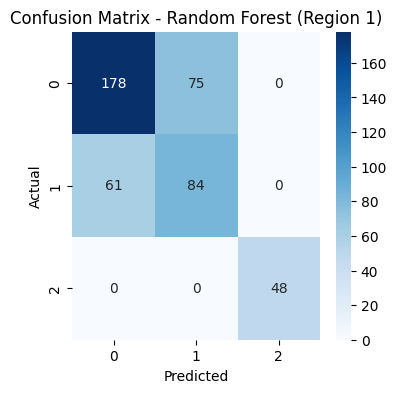


=== Random Forest - Region 1 ===
Validation Accuracy: 0.6637
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       253
           1       0.53      0.58      0.55       145
           2       1.00      1.00      1.00        48

    accuracy                           0.70       446
   macro avg       0.76      0.76      0.76       446
weighted avg       0.70      0.70      0.70       446

Test Accuracy: 0.6951
Precision: 0.7019
Recall: 0.6951
F1 Score: 0.6978
ROC AUC: 0.8285


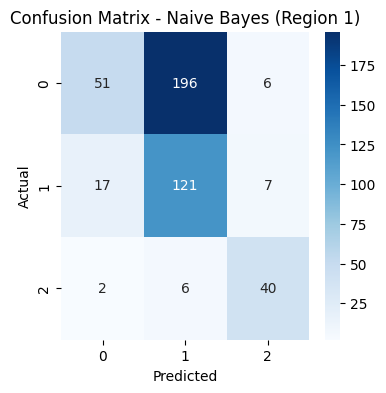


=== Naive Bayes - Region 1 ===
Validation Accuracy: 0.4910
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.20      0.32       253
           1       0.37      0.83      0.52       145
           2       0.75      0.83      0.79        48

    accuracy                           0.48       446
   macro avg       0.62      0.62      0.54       446
weighted avg       0.62      0.48      0.43       446

Test Accuracy: 0.4753
Precision: 0.6163
Recall: 0.4753
F1 Score: 0.4325
ROC AUC: 0.7404


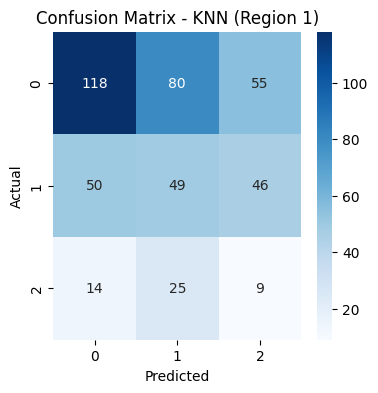


=== KNN - Region 1 ===
Validation Accuracy: 0.3789
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.47      0.54       253
           1       0.32      0.34      0.33       145
           2       0.08      0.19      0.11        48

    accuracy                           0.39       446
   macro avg       0.35      0.33      0.33       446
weighted avg       0.48      0.39      0.43       446

Test Accuracy: 0.3946
Precision: 0.4800
Recall: 0.3946
F1 Score: 0.4266
ROC AUC: 0.5172


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


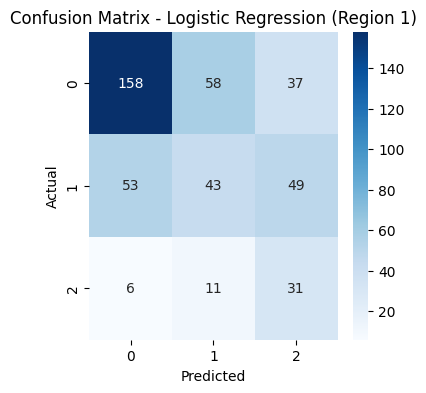


=== Logistic Regression - Region 1 ===
Validation Accuracy: 0.5224
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       253
           1       0.38      0.30      0.33       145
           2       0.26      0.65      0.38        48

    accuracy                           0.52       446
   macro avg       0.46      0.52      0.46       446
weighted avg       0.57      0.52      0.53       446

Test Accuracy: 0.5202
Precision: 0.5664
Recall: 0.5202
F1 Score: 0.5306
ROC AUC: 0.7163


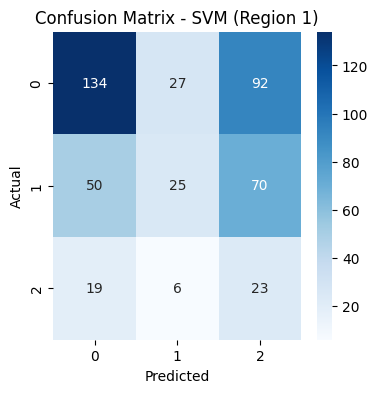


=== SVM - Region 1 ===
Validation Accuracy: 0.3700
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       253
           1       0.43      0.17      0.25       145
           2       0.12      0.48      0.20        48

    accuracy                           0.41       446
   macro avg       0.41      0.39      0.34       446
weighted avg       0.53      0.41      0.43       446

Test Accuracy: 0.4081
Precision: 0.5280
Recall: 0.4081
F1 Score: 0.4347
ROC AUC: 0.5885


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


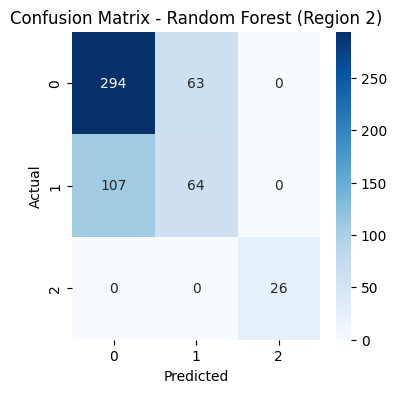


=== Random Forest - Region 2 ===
Validation Accuracy: 0.6877
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.78       357
           1       0.50      0.37      0.43       171
           2       1.00      1.00      1.00        26

    accuracy                           0.69       554
   macro avg       0.75      0.73      0.74       554
weighted avg       0.67      0.69      0.68       554

Test Accuracy: 0.6931
Precision: 0.6749
Recall: 0.6931
F1 Score: 0.6794
ROC AUC: 0.8105


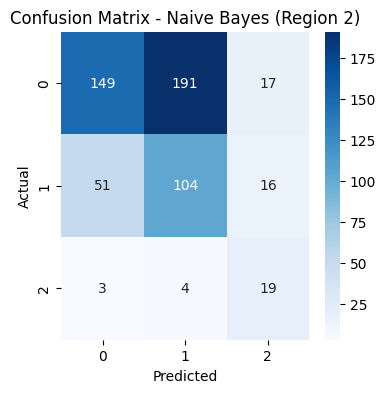


=== Naive Bayes - Region 2 ===
Validation Accuracy: 0.5307
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.42      0.53       357
           1       0.35      0.61      0.44       171
           2       0.37      0.73      0.49        26

    accuracy                           0.49       554
   macro avg       0.48      0.59      0.49       554
weighted avg       0.60      0.49      0.50       554

Test Accuracy: 0.4910
Precision: 0.5975
Recall: 0.4910
F1 Score: 0.5024
ROC AUC: 0.6687


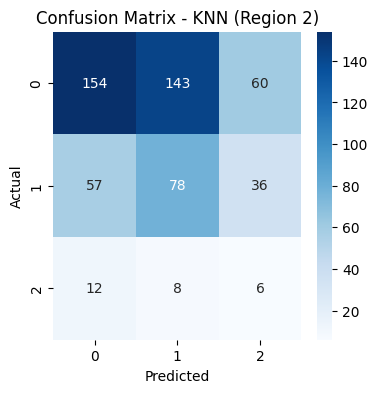


=== KNN - Region 2 ===
Validation Accuracy: 0.3700
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.43      0.53       357
           1       0.34      0.46      0.39       171
           2       0.06      0.23      0.09        26

    accuracy                           0.43       554
   macro avg       0.36      0.37      0.34       554
weighted avg       0.55      0.43      0.47       554

Test Accuracy: 0.4296
Precision: 0.5529
Recall: 0.4296
F1 Score: 0.4670
ROC AUC: 0.5462


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


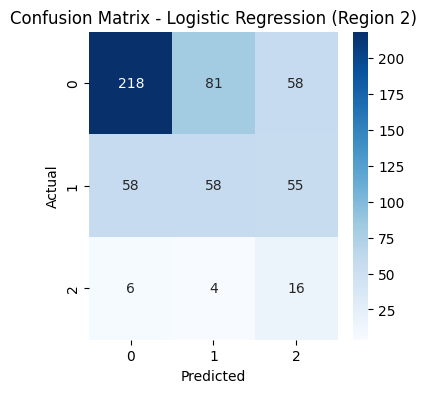


=== Logistic Regression - Region 2 ===
Validation Accuracy: 0.5451
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       357
           1       0.41      0.34      0.37       171
           2       0.12      0.62      0.21        26

    accuracy                           0.53       554
   macro avg       0.43      0.52      0.42       554
weighted avg       0.63      0.53      0.56       554

Test Accuracy: 0.5271
Precision: 0.6292
Recall: 0.5271
F1 Score: 0.5634
ROC AUC: 0.6727


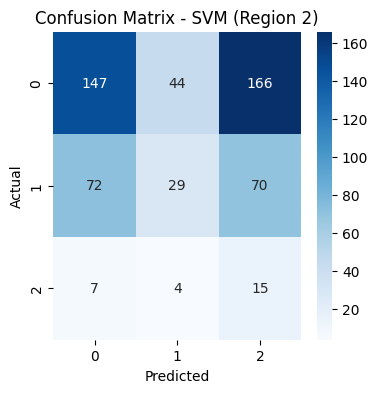


=== SVM - Region 2 ===
Validation Accuracy: 0.3087
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.41      0.50       357
           1       0.38      0.17      0.23       171
           2       0.06      0.58      0.11        26

    accuracy                           0.34       554
   macro avg       0.36      0.39      0.28       554
weighted avg       0.54      0.34      0.40       554

Test Accuracy: 0.3448
Precision: 0.5382
Recall: 0.3448
F1 Score: 0.4022
ROC AUC: 0.5391


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


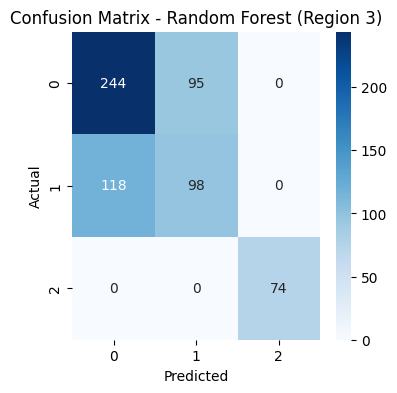


=== Random Forest - Region 3 ===
Validation Accuracy: 0.7186
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       339
           1       0.51      0.45      0.48       216
           2       1.00      1.00      1.00        74

    accuracy                           0.66       629
   macro avg       0.73      0.72      0.73       629
weighted avg       0.66      0.66      0.66       629

Test Accuracy: 0.6614
Precision: 0.6553
Recall: 0.6614
F1 Score: 0.6574
ROC AUC: 0.8270


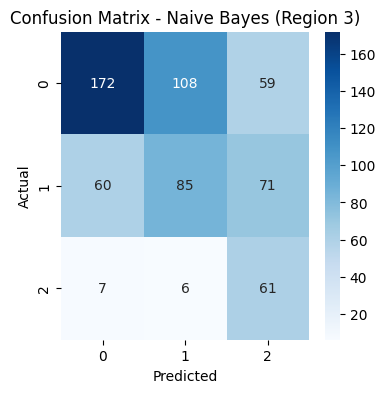


=== Naive Bayes - Region 3 ===
Validation Accuracy: 0.5103
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.51      0.60       339
           1       0.43      0.39      0.41       216
           2       0.32      0.82      0.46        74

    accuracy                           0.51       629
   macro avg       0.49      0.58      0.49       629
weighted avg       0.57      0.51      0.52       629

Test Accuracy: 0.5056
Precision: 0.5721
Recall: 0.5056
F1 Score: 0.5156
ROC AUC: 0.7187


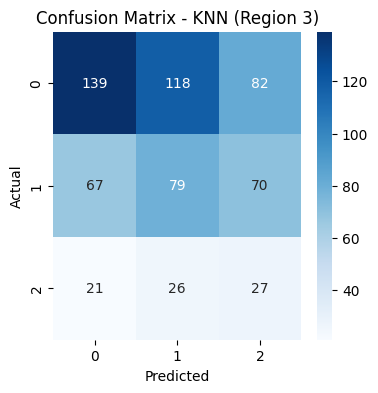


=== KNN - Region 3 ===
Validation Accuracy: 0.3625
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.41      0.49       339
           1       0.35      0.37      0.36       216
           2       0.15      0.36      0.21        74

    accuracy                           0.39       629
   macro avg       0.37      0.38      0.35       629
weighted avg       0.47      0.39      0.41       629

Test Accuracy: 0.3895
Precision: 0.4694
Recall: 0.3895
F1 Score: 0.4134
ROC AUC: 0.5332


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


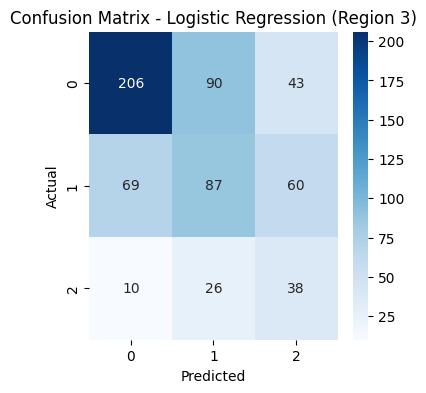


=== Logistic Regression - Region 3 ===
Validation Accuracy: 0.5231
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       339
           1       0.43      0.40      0.42       216
           2       0.27      0.51      0.35        74

    accuracy                           0.53       629
   macro avg       0.47      0.51      0.48       629
weighted avg       0.57      0.53      0.54       629

Test Accuracy: 0.5262
Precision: 0.5684
Recall: 0.5262
F1 Score: 0.5400
ROC AUC: 0.6795


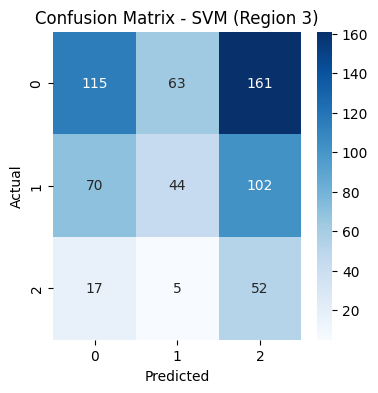


=== SVM - Region 3 ===
Validation Accuracy: 0.3450
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.34      0.43       339
           1       0.39      0.20      0.27       216
           2       0.17      0.70      0.27        74

    accuracy                           0.34       629
   macro avg       0.38      0.42      0.32       629
weighted avg       0.46      0.34      0.35       629

Test Accuracy: 0.3355
Precision: 0.4612
Recall: 0.3355
F1 Score: 0.3527
ROC AUC: 0.5877


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


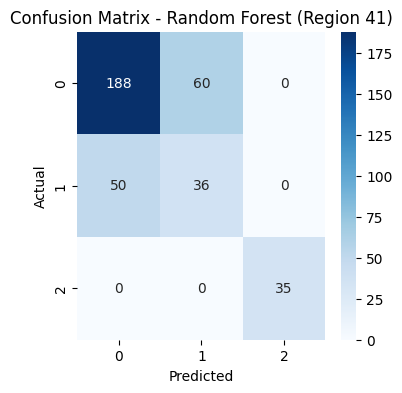


=== Random Forest - Region 41 ===
Validation Accuracy: 0.6911
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       248
           1       0.38      0.42      0.40        86
           2       1.00      1.00      1.00        35

    accuracy                           0.70       369
   macro avg       0.72      0.73      0.72       369
weighted avg       0.71      0.70      0.71       369

Test Accuracy: 0.7019
Precision: 0.7131
Recall: 0.7019
F1 Score: 0.7070
ROC AUC: 0.8196


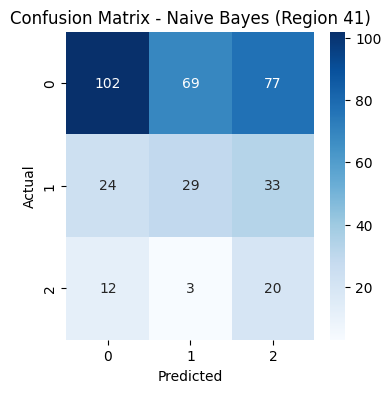


=== Naive Bayes - Region 41 ===
Validation Accuracy: 0.3713
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.41      0.53       248
           1       0.29      0.34      0.31        86
           2       0.15      0.57      0.24        35

    accuracy                           0.41       369
   macro avg       0.39      0.44      0.36       369
weighted avg       0.58      0.41      0.45       369

Test Accuracy: 0.4092
Precision: 0.5783
Recall: 0.4092
F1 Score: 0.4505
ROC AUC: 0.5820


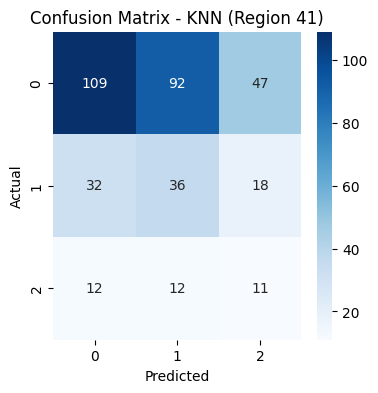


=== KNN - Region 41 ===
Validation Accuracy: 0.4038
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       248
           1       0.26      0.42      0.32        86
           2       0.14      0.31      0.20        35

    accuracy                           0.42       369
   macro avg       0.37      0.39      0.35       369
weighted avg       0.55      0.42      0.46       369

Test Accuracy: 0.4228
Precision: 0.5525
Recall: 0.4228
F1 Score: 0.4584
ROC AUC: 0.5585


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


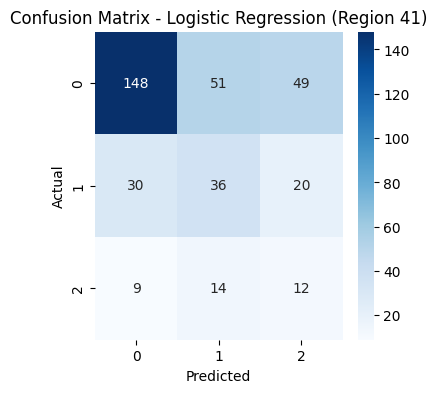


=== Logistic Regression - Region 41 ===
Validation Accuracy: 0.4959
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       248
           1       0.36      0.42      0.39        86
           2       0.15      0.34      0.21        35

    accuracy                           0.53       369
   macro avg       0.43      0.45      0.42       369
weighted avg       0.63      0.53      0.57       369

Test Accuracy: 0.5312
Precision: 0.6290
Recall: 0.5312
F1 Score: 0.5667
ROC AUC: 0.6349


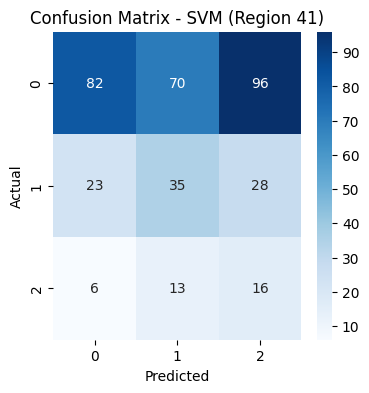


=== SVM - Region 41 ===
Validation Accuracy: 0.2818
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.33      0.46       248
           1       0.30      0.41      0.34        86
           2       0.11      0.46      0.18        35

    accuracy                           0.36       369
   macro avg       0.38      0.40      0.33       369
weighted avg       0.58      0.36      0.40       369

Test Accuracy: 0.3604
Precision: 0.5765
Recall: 0.3604
F1 Score: 0.4043
ROC AUC: 0.5582


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


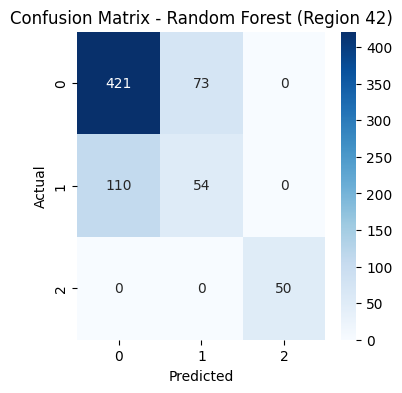


=== Random Forest - Region 42 ===
Validation Accuracy: 0.7345
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       494
           1       0.43      0.33      0.37       164
           2       1.00      1.00      1.00        50

    accuracy                           0.74       708
   macro avg       0.74      0.73      0.73       708
weighted avg       0.72      0.74      0.73       708

Test Accuracy: 0.7415
Precision: 0.7223
Recall: 0.7415
F1 Score: 0.7298
ROC AUC: 0.8160


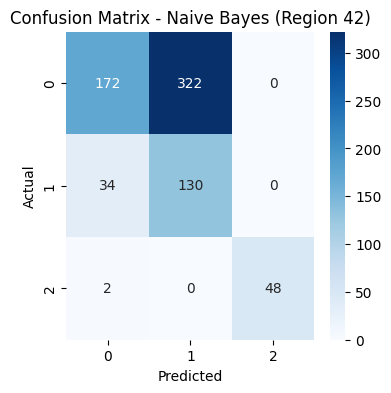


=== Naive Bayes - Region 42 ===
Validation Accuracy: 0.4576
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.35      0.49       494
           1       0.29      0.79      0.42       164
           2       1.00      0.96      0.98        50

    accuracy                           0.49       708
   macro avg       0.70      0.70      0.63       708
weighted avg       0.71      0.49      0.51       708

Test Accuracy: 0.4944
Precision: 0.7142
Recall: 0.4944
F1 Score: 0.5089
ROC AUC: 0.7803


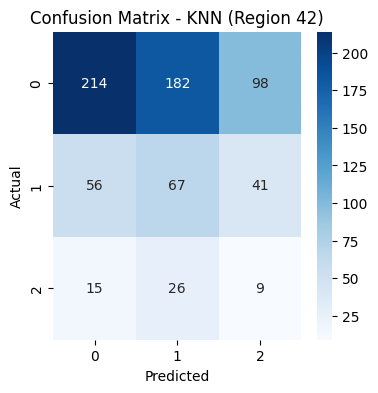


=== KNN - Region 42 ===
Validation Accuracy: 0.4167
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.43      0.55       494
           1       0.24      0.41      0.31       164
           2       0.06      0.18      0.09        50

    accuracy                           0.41       708
   macro avg       0.35      0.34      0.32       708
weighted avg       0.58      0.41      0.46       708

Test Accuracy: 0.4096
Precision: 0.5846
Recall: 0.4096
F1 Score: 0.4605
ROC AUC: 0.5200


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


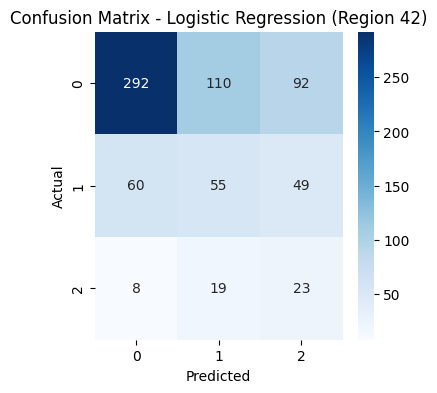


=== Logistic Regression - Region 42 ===
Validation Accuracy: 0.5494
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       494
           1       0.30      0.34      0.32       164
           2       0.14      0.46      0.21        50

    accuracy                           0.52       708
   macro avg       0.42      0.46      0.40       708
weighted avg       0.65      0.52      0.57       708

Test Accuracy: 0.5226
Precision: 0.6451
Recall: 0.5226
F1 Score: 0.5655
ROC AUC: 0.6745


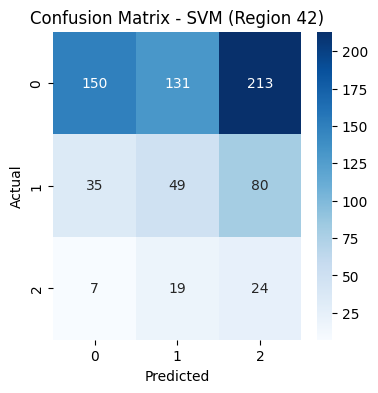


=== SVM - Region 42 ===
Validation Accuracy: 0.3390
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.30      0.44       494
           1       0.25      0.30      0.27       164
           2       0.08      0.48      0.13        50

    accuracy                           0.31       708
   macro avg       0.37      0.36      0.28       708
weighted avg       0.61      0.31      0.38       708

Test Accuracy: 0.3150
Precision: 0.6075
Recall: 0.3150
F1 Score: 0.3769
ROC AUC: 0.5609


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


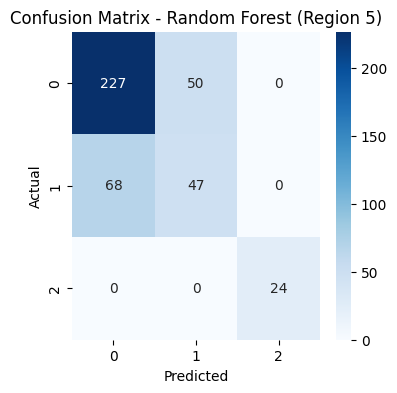


=== Random Forest - Region 5 ===
Validation Accuracy: 0.7163
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       277
           1       0.48      0.41      0.44       115
           2       1.00      1.00      1.00        24

    accuracy                           0.72       416
   macro avg       0.75      0.74      0.75       416
weighted avg       0.70      0.72      0.71       416

Test Accuracy: 0.7163
Precision: 0.7040
Recall: 0.7163
F1 Score: 0.7088
ROC AUC: 0.8036


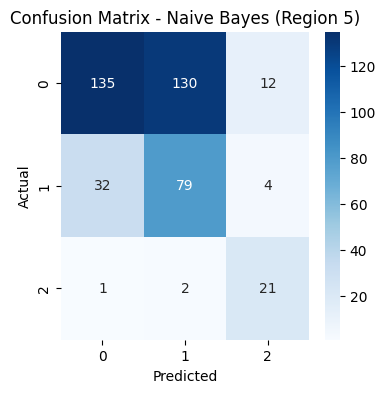


=== Naive Bayes - Region 5 ===
Validation Accuracy: 0.5433
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.49      0.61       277
           1       0.37      0.69      0.48       115
           2       0.57      0.88      0.69        24

    accuracy                           0.56       416
   macro avg       0.58      0.68      0.59       416
weighted avg       0.67      0.56      0.58       416

Test Accuracy: 0.5649
Precision: 0.6713
Recall: 0.5649
F1 Score: 0.5777
ROC AUC: 0.7199


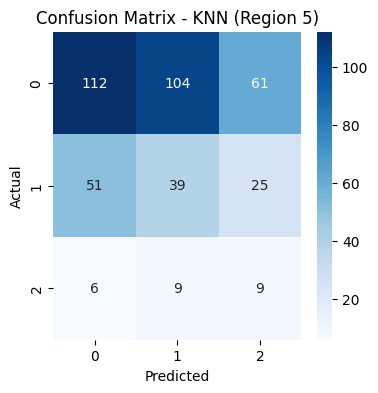


=== KNN - Region 5 ===
Validation Accuracy: 0.3606
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.40      0.50       277
           1       0.26      0.34      0.29       115
           2       0.09      0.38      0.15        24

    accuracy                           0.38       416
   macro avg       0.34      0.37      0.32       416
weighted avg       0.52      0.38      0.42       416

Test Accuracy: 0.3846
Precision: 0.5177
Recall: 0.3846
F1 Score: 0.4239
ROC AUC: 0.5252


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


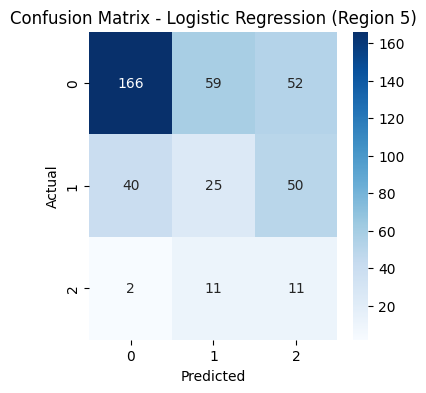


=== Logistic Regression - Region 5 ===
Validation Accuracy: 0.4856
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.60      0.68       277
           1       0.26      0.22      0.24       115
           2       0.10      0.46      0.16        24

    accuracy                           0.49       416
   macro avg       0.39      0.43      0.36       416
weighted avg       0.61      0.49      0.53       416

Test Accuracy: 0.4856
Precision: 0.6098
Recall: 0.4856
F1 Score: 0.5309
ROC AUC: 0.6524


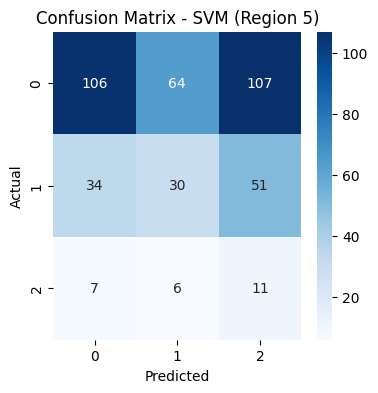


=== SVM - Region 5 ===
Validation Accuracy: 0.3846
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.38      0.50       277
           1       0.30      0.26      0.28       115
           2       0.07      0.46      0.11        24

    accuracy                           0.35       416
   macro avg       0.36      0.37      0.30       416
weighted avg       0.57      0.35      0.42       416

Test Accuracy: 0.3534
Precision: 0.5668
Recall: 0.3534
F1 Score: 0.4167
ROC AUC: 0.5368


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


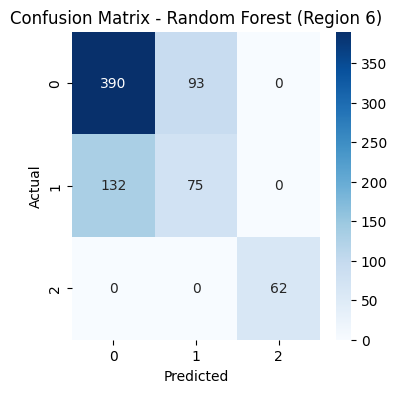


=== Random Forest - Region 6 ===
Validation Accuracy: 0.7181
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       483
           1       0.45      0.36      0.40       207
           2       1.00      1.00      1.00        62

    accuracy                           0.70       752
   macro avg       0.73      0.72      0.73       752
weighted avg       0.69      0.70      0.69       752

Test Accuracy: 0.7008
Precision: 0.6852
Recall: 0.7008
F1 Score: 0.6910
ROC AUC: 0.8171


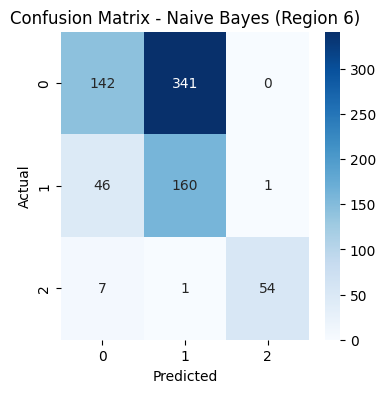


=== Naive Bayes - Region 6 ===
Validation Accuracy: 0.4601
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.29      0.42       483
           1       0.32      0.77      0.45       207
           2       0.98      0.87      0.92        62

    accuracy                           0.47       752
   macro avg       0.68      0.65      0.60       752
weighted avg       0.64      0.47      0.47       752

Test Accuracy: 0.4734
Precision: 0.6364
Recall: 0.4734
F1 Score: 0.4694
ROC AUC: 0.7215


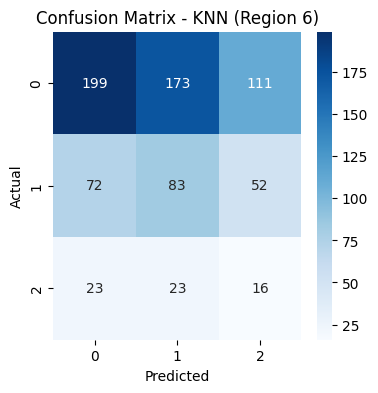


=== KNN - Region 6 ===
Validation Accuracy: 0.3750
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       483
           1       0.30      0.40      0.34       207
           2       0.09      0.26      0.13        62

    accuracy                           0.40       752
   macro avg       0.35      0.36      0.33       752
weighted avg       0.52      0.40      0.43       752

Test Accuracy: 0.3963
Precision: 0.5240
Recall: 0.3963
F1 Score: 0.4340
ROC AUC: 0.5166


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


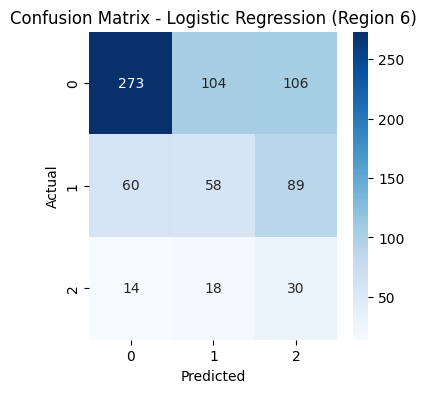


=== Logistic Regression - Region 6 ===
Validation Accuracy: 0.5186
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       483
           1       0.32      0.28      0.30       207
           2       0.13      0.48      0.21        62

    accuracy                           0.48       752
   macro avg       0.41      0.44      0.39       752
weighted avg       0.61      0.48      0.52       752

Test Accuracy: 0.4801
Precision: 0.6050
Recall: 0.4801
F1 Score: 0.5223
ROC AUC: 0.6584


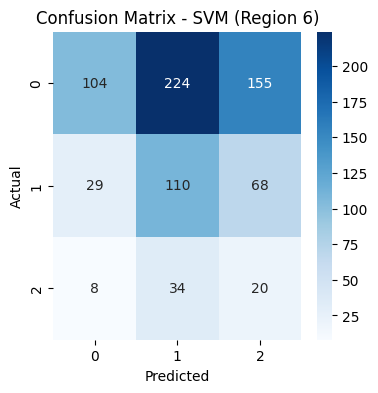


=== SVM - Region 6 ===
Validation Accuracy: 0.3138
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.22      0.33       483
           1       0.30      0.53      0.38       207
           2       0.08      0.32      0.13        62

    accuracy                           0.31       752
   macro avg       0.37      0.36      0.28       752
weighted avg       0.56      0.31      0.33       752

Test Accuracy: 0.3112
Precision: 0.5628
Recall: 0.3112
F1 Score: 0.3302
ROC AUC: 0.5443


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


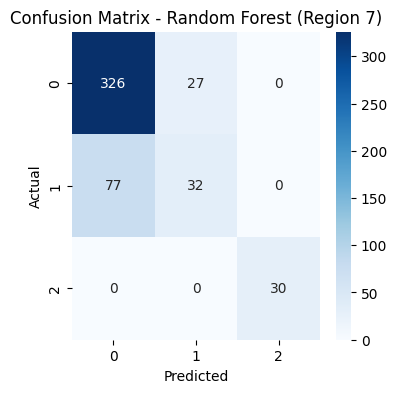


=== Random Forest - Region 7 ===
Validation Accuracy: 0.7079
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       353
           1       0.54      0.29      0.38       109
           2       1.00      1.00      1.00        30

    accuracy                           0.79       492
   macro avg       0.78      0.74      0.75       492
weighted avg       0.76      0.79      0.76       492

Test Accuracy: 0.7886
Precision: 0.7615
Recall: 0.7886
F1 Score: 0.7642
ROC AUC: 0.8293


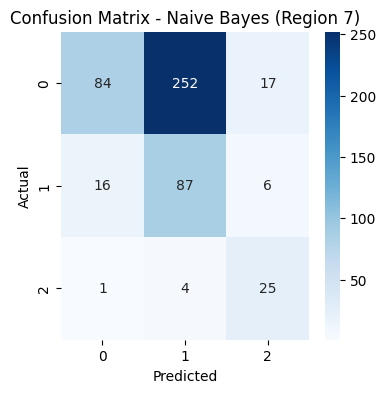


=== Naive Bayes - Region 7 ===
Validation Accuracy: 0.4320
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.24      0.37       353
           1       0.25      0.80      0.38       109
           2       0.52      0.83      0.64        30

    accuracy                           0.40       492
   macro avg       0.54      0.62      0.47       492
weighted avg       0.68      0.40      0.39       492

Test Accuracy: 0.3984
Precision: 0.6847
Recall: 0.3984
F1 Score: 0.3899
ROC AUC: 0.7009


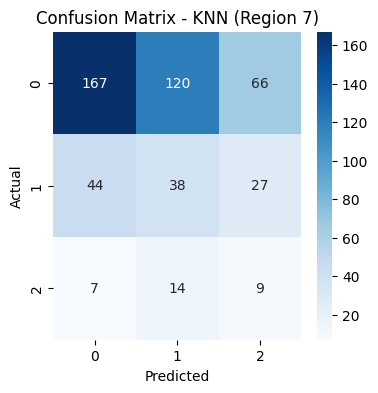


=== KNN - Region 7 ===
Validation Accuracy: 0.4199
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.47      0.58       353
           1       0.22      0.35      0.27       109
           2       0.09      0.30      0.14        30

    accuracy                           0.43       492
   macro avg       0.36      0.37      0.33       492
weighted avg       0.60      0.43      0.49       492

Test Accuracy: 0.4350
Precision: 0.6040
Recall: 0.4350
F1 Score: 0.4879
ROC AUC: 0.5418


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


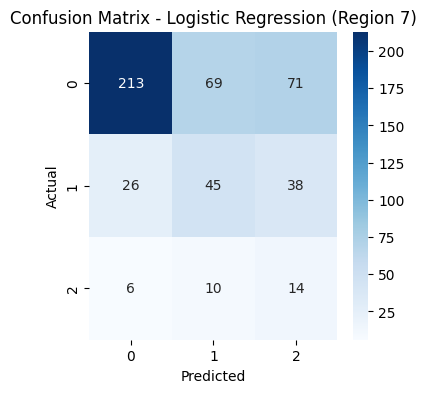


=== Logistic Regression - Region 7 ===
Validation Accuracy: 0.5456
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       353
           1       0.36      0.41      0.39       109
           2       0.11      0.47      0.18        30

    accuracy                           0.55       492
   macro avg       0.45      0.49      0.43       492
weighted avg       0.71      0.55      0.61       492

Test Accuracy: 0.5528
Precision: 0.7111
Recall: 0.5528
F1 Score: 0.6078
ROC AUC: 0.7036


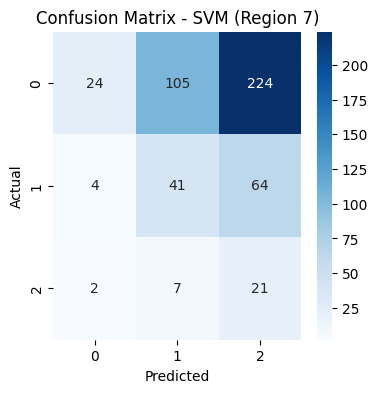


=== SVM - Region 7 ===
Validation Accuracy: 0.1947
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.07      0.13       353
           1       0.27      0.38      0.31       109
           2       0.07      0.70      0.12        30

    accuracy                           0.17       492
   macro avg       0.38      0.38      0.19       492
weighted avg       0.64      0.17      0.17       492

Test Accuracy: 0.1748
Precision: 0.6375
Recall: 0.1748
F1 Score: 0.1668
ROC AUC: 0.5538


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


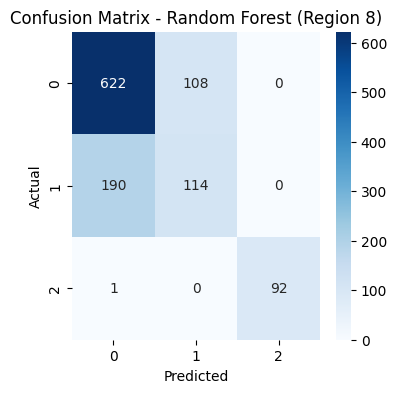


=== Random Forest - Region 8 ===
Validation Accuracy: 0.7329
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       730
           1       0.51      0.38      0.43       304
           2       1.00      0.99      0.99        93

    accuracy                           0.73      1127
   macro avg       0.76      0.74      0.74      1127
weighted avg       0.72      0.73      0.72      1127

Test Accuracy: 0.7347
Precision: 0.7166
Recall: 0.7347
F1 Score: 0.7212
ROC AUC: 0.8452


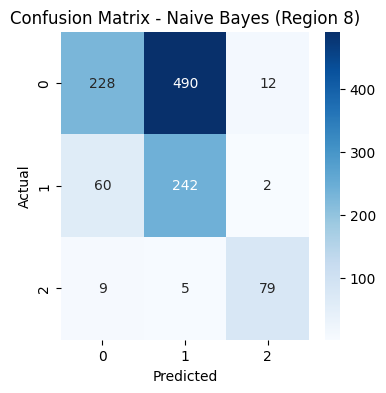


=== Naive Bayes - Region 8 ===
Validation Accuracy: 0.4916
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.31      0.44       730
           1       0.33      0.80      0.46       304
           2       0.85      0.85      0.85        93

    accuracy                           0.49      1127
   macro avg       0.65      0.65      0.59      1127
weighted avg       0.66      0.49      0.48      1127

Test Accuracy: 0.4871
Precision: 0.6559
Recall: 0.4871
F1 Score: 0.4831
ROC AUC: 0.7642


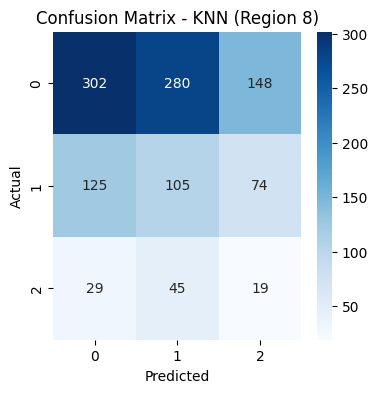


=== KNN - Region 8 ===
Validation Accuracy: 0.3886
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.41      0.51       730
           1       0.24      0.35      0.29       304
           2       0.08      0.20      0.11        93

    accuracy                           0.38      1127
   macro avg       0.33      0.32      0.30      1127
weighted avg       0.50      0.38      0.42      1127

Test Accuracy: 0.3780
Precision: 0.5014
Recall: 0.3780
F1 Score: 0.4164
ROC AUC: 0.4924


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


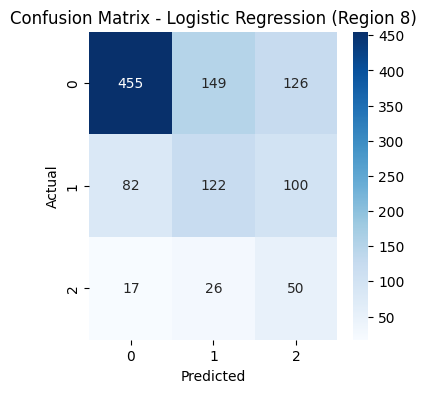


=== Logistic Regression - Region 8 ===
Validation Accuracy: 0.5395
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.62      0.71       730
           1       0.41      0.40      0.41       304
           2       0.18      0.54      0.27        93

    accuracy                           0.56      1127
   macro avg       0.47      0.52      0.46      1127
weighted avg       0.66      0.56      0.59      1127

Test Accuracy: 0.5563
Precision: 0.6577
Recall: 0.5563
F1 Score: 0.5909
ROC AUC: 0.7140


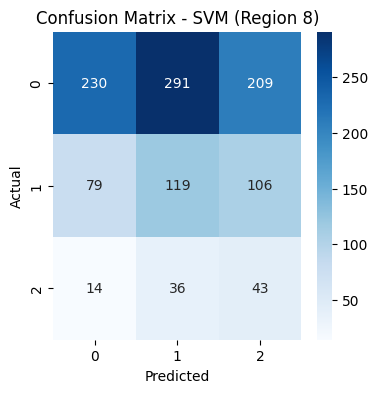


=== SVM - Region 8 ===
Validation Accuracy: 0.3620
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.32      0.44       730
           1       0.27      0.39      0.32       304
           2       0.12      0.46      0.19        93

    accuracy                           0.35      1127
   macro avg       0.37      0.39      0.31      1127
weighted avg       0.54      0.35      0.38      1127

Test Accuracy: 0.3478
Precision: 0.5431
Recall: 0.3478
F1 Score: 0.3843
ROC AUC: 0.5877


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


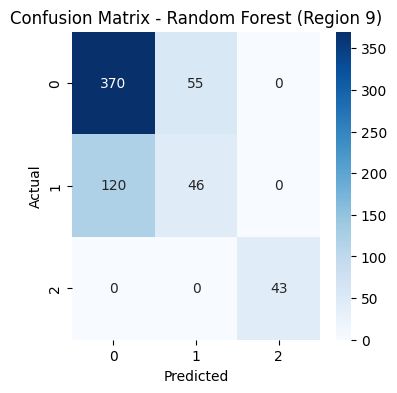


=== Random Forest - Region 9 ===
Validation Accuracy: 0.7397
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       425
           1       0.46      0.28      0.34       166
           2       1.00      1.00      1.00        43

    accuracy                           0.72       634
   macro avg       0.74      0.72      0.72       634
weighted avg       0.69      0.72      0.70       634

Test Accuracy: 0.7240
Precision: 0.6933
Recall: 0.7240
F1 Score: 0.7002
ROC AUC: 0.8056


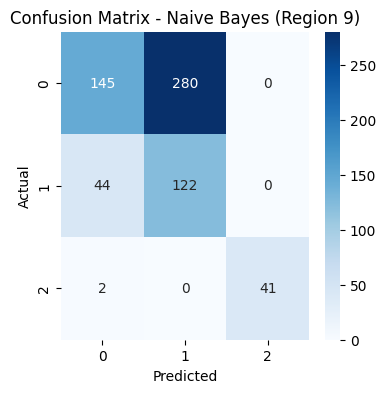


=== Naive Bayes - Region 9 ===
Validation Accuracy: 0.4874
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.34      0.47       425
           1       0.30      0.73      0.43       166
           2       1.00      0.95      0.98        43

    accuracy                           0.49       634
   macro avg       0.69      0.68      0.63       634
weighted avg       0.66      0.49      0.49       634

Test Accuracy: 0.4858
Precision: 0.6562
Recall: 0.4858
F1 Score: 0.4943
ROC AUC: 0.7478


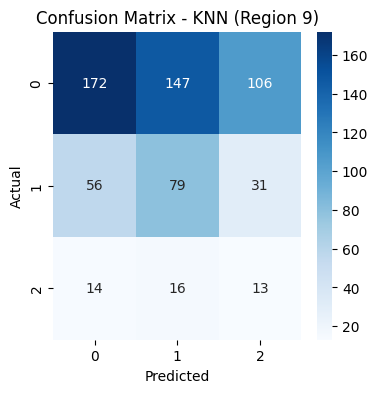


=== KNN - Region 9 ===
Validation Accuracy: 0.3927
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.40      0.52       425
           1       0.33      0.48      0.39       166
           2       0.09      0.30      0.13        43

    accuracy                           0.42       634
   macro avg       0.37      0.39      0.35       634
weighted avg       0.57      0.42      0.46       634

Test Accuracy: 0.4164
Precision: 0.5678
Recall: 0.4164
F1 Score: 0.4563
ROC AUC: 0.5373


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


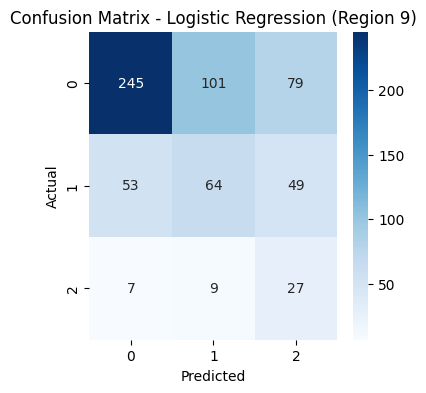


=== Logistic Regression - Region 9 ===
Validation Accuracy: 0.5442
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       425
           1       0.37      0.39      0.38       166
           2       0.17      0.63      0.27        43

    accuracy                           0.53       634
   macro avg       0.45      0.53      0.44       634
weighted avg       0.65      0.53      0.57       634

Test Accuracy: 0.5300
Precision: 0.6466
Recall: 0.5300
F1 Score: 0.5670
ROC AUC: 0.6777


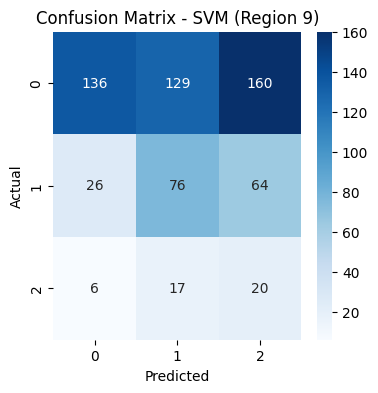


=== SVM - Region 9 ===
Validation Accuracy: 0.3470
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.32      0.46       425
           1       0.34      0.46      0.39       166
           2       0.08      0.47      0.14        43

    accuracy                           0.37       634
   macro avg       0.41      0.41      0.33       634
weighted avg       0.64      0.37      0.42       634

Test Accuracy: 0.3659
Precision: 0.6379
Recall: 0.3659
F1 Score: 0.4195
ROC AUC: 0.5914


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


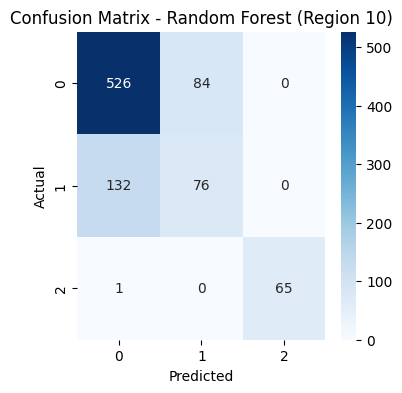


=== Random Forest - Region 10 ===
Validation Accuracy: 0.7330
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       610
           1       0.47      0.37      0.41       208
           2       1.00      0.98      0.99        66

    accuracy                           0.75       884
   macro avg       0.76      0.74      0.74       884
weighted avg       0.74      0.75      0.74       884

Test Accuracy: 0.7545
Precision: 0.7372
Recall: 0.7545
F1 Score: 0.7433
ROC AUC: 0.8378


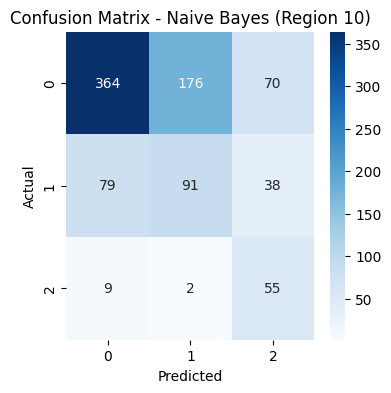


=== Naive Bayes - Region 10 ===
Validation Accuracy: 0.5351
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       610
           1       0.34      0.44      0.38       208
           2       0.34      0.83      0.48        66

    accuracy                           0.58       884
   macro avg       0.49      0.62      0.52       884
weighted avg       0.66      0.58      0.60       884

Test Accuracy: 0.5769
Precision: 0.6605
Recall: 0.5769
F1 Score: 0.5987
ROC AUC: 0.7351


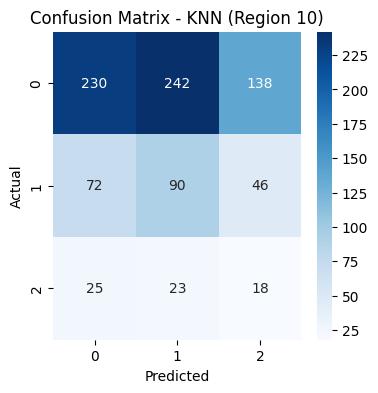


=== KNN - Region 10 ===
Validation Accuracy: 0.3959
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49       610
           1       0.25      0.43      0.32       208
           2       0.09      0.27      0.13        66

    accuracy                           0.38       884
   macro avg       0.35      0.36      0.31       884
weighted avg       0.55      0.38      0.42       884

Test Accuracy: 0.3824
Precision: 0.5517
Recall: 0.3824
F1 Score: 0.4240
ROC AUC: 0.5314


C:\Users\evmagante\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


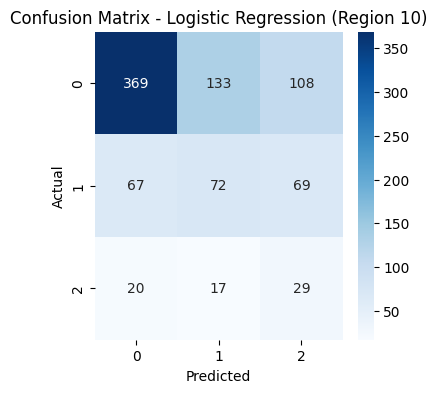


=== Logistic Regression - Region 10 ===
Validation Accuracy: 0.5419
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       610
           1       0.32      0.35      0.33       208
           2       0.14      0.44      0.21        66

    accuracy                           0.53       884
   macro avg       0.42      0.46      0.41       884
weighted avg       0.65      0.53      0.57       884

Test Accuracy: 0.5317
Precision: 0.6452
Recall: 0.5317
F1 Score: 0.5724
ROC AUC: 0.6670


In [ ]:
import pandas as pd

# Containers for results
results_rf = []
results_nb = []
results_knn = []
results_lr = []
results_svm = []


for REGION in ["region_1", "region_2", "region_3", "region_41", "region_42",
               "region_5", "region_6", "region_7", "region_8", "region_9",
               "region_10", "region_11", "region_12", "region_13", "region_14",
               "region_15", "region_16"]:
    REGION = REGION
    LABEL = f"Region {REGION.split('_')[1]}"

    def record_metrics(region, model_name, metrics):
        return {
            "Region": region,
            "Test Accuracy": metrics["test_accuracy"],
            "Precision": metrics["precision"],
            "Recall": metrics["recall"],
            "F1 Score": metrics["f1_score"],
            "ROC AUC": metrics["roc_auc"]
        }

    # Load data for that region
    X_train, y_train, X_val, y_val, X_test, y_test = load_region_data(REGION)

    # Call the function
    train_random_forest(X_train, y_train)
    train_naive_bayes(X_train, y_train)
    train_knn(X_train, y_train)
    train_logistic_regression(X_train, y_train)
    train_svm(X_train, y_train)

    # Train and evaluate Random Forest
    rf_model = train_random_forest(X_train, y_train)
    val_pred_rf, test_pred_rf, test_prob_rf = predict_model(rf_model, X_val, X_test)
    metrics_rf = evaluate_model(y_val, val_pred_rf, y_test, test_pred_rf, test_prob_rf)
    display_results(y_test, test_pred_rf, metrics_rf, LABEL, model_name="Random Forest")
    results_rf.append(record_metrics(LABEL, "Random Forest", metrics_rf))

    # Train and evaluate Naive Bayes
    nb_model = train_naive_bayes(X_train, y_train)
    val_pred_nb, test_pred_nb, test_prob_nb = predict_model(nb_model, X_val, X_test)
    metrics_nb = evaluate_model(y_val, val_pred_nb, y_test, test_pred_nb, test_prob_nb)
    display_results(y_test, test_pred_nb, metrics_nb, LABEL, model_name="Naive Bayes")
    results_nb.append(record_metrics(LABEL, "Naive Bayes", metrics_nb))

    # Train and evaluate KNN
    knn_model = train_knn(X_train, y_train)
    val_pred_knn, test_pred_knn, test_prob_knn = predict_model(knn_model, X_val, X_test)
    metrics_knn = evaluate_model(y_val, val_pred_knn, y_test, test_pred_knn, test_prob_knn)
    display_results(y_test, test_pred_knn, metrics_knn, LABEL, model_name="KNN")
    results_knn.append(record_metrics(LABEL, "KNN", metrics_knn))

    # Train and evaluate Logistic Regression
    lr_model = train_logistic_regression(X_train, y_train)
    val_pred_lr, test_pred_lr, test_prob_lr = predict_model(lr_model, X_val, X_test)
    metrics_lr = evaluate_model(y_val, val_pred_lr, y_test, test_pred_lr, test_prob_lr)
    display_results(y_test, test_pred_lr, metrics_lr, LABEL, model_name="Logistic Regression")
    results_lr.append(record_metrics(LABEL, "Logistic Regression", metrics_lr))

    # Train and evaluate SVM
    svm_model = train_svm(X_train, y_train)
    val_pred_svm, test_pred_svm, test_prob_svm = predict_model(svm_model, X_val, X_test)
    metrics_svm = evaluate_model(y_val, val_pred_svm, y_test, test_pred_svm, test_prob_svm)
    display_results(y_test, test_pred_svm, metrics_svm, LABEL, model_name="SVM")
    results_svm.append(record_metrics(LABEL, "SVM", metrics_svm))

# Convert lists to DataFrames
df_rf = pd.DataFrame(results_rf)
df_nb = pd.DataFrame(results_nb)
df_knn = pd.DataFrame(results_knn)
df_lr = pd.DataFrame(results_lr)
df_svm = pd.DataFrame(results_svm)

print("\n=== Random Forest Results ===")
print(df_rf)

print("\n=== Naive Bayes Results ===")
print(df_nb)

print("\n=== KNN Results ===")
print(df_knn)

print("\n=== Logistic Regression Results ===")
print(df_lr)

print("\n=== SVM Results ===")
print(df_svm)